# Part-04A: Deep NLP Text Preparation

## Introduction

Deep learning models have shown great potential in processing and understanding large volumes of text data. This notebook is dedicated to preparing text data for deep learning models using TensorFlow. We will cover essential steps such as creating train-test-validation splits, using Keras' TextVectorization layer, and building and evaluating various neural network models.

#### Objectives

1. **Prepare Data for Deep Learning**:
   - Load and preprocess the Amazon Product Reviews dataset.
   - Create train-test-validation splits to ensure robust model training and evaluation.

2. **Text Vectorization**:
   - Utilize Keras' TextVectorization layer to convert raw text into sequences of integers.
   - Determine appropriate sequence lengths and batch the data for efficient processing.

3. **Use Pre-trained Word Embeddings**:
   - Load and utilize pre-trained GloVe word embeddings to enrich the text data with semantic information.
   - Perform operations such as similarity checks and word arithmetic to explore the embeddings.

4. **Build and Evaluate Neural Network Models**:
   - Build and compile various neural network architectures, including Simple RNN, LSTM, GRU, and Attention models.
   - Train the models using the prepared data and evaluate their performance using appropriate metrics.

By the end of this notebook, we will have a set of well-prepared text data and trained deep learning models ready for further analysis and deployment. This preparation ensures that our models can effectively process and understand the text data, providing valuable insights and accurate predictions.


In [1]:
# Adding parent directory to python path
import sys, os
sys.path.append( os.path.abspath('../'))

In [2]:
## Load the autoreload extension
!pip install -U dojo_ds -q
import dojo_ds as ds
# %load_ext autoreload 
# %autoreload 2

# import custom_functions_SOLUTION  as fn

## Data

In [3]:
from IPython.display import display, Markdown
with open("data/Amazon Product Reviews.md") as f:
    display(Markdown(f.read()))

# Amazon Product Reviews

- URL: https://cseweb.ucsd.edu/~jmcauley/datasets.html#amazon_reviews 

## Description

This is a large crawl of product reviews from Amazon. This dataset contains 82.83 million unique reviews, from around 20 million users.

## Basic statistics

| Ratings:  | 82.83 million        |
| --------- | -------------------- |
| Users:    | 20.98 million        |
| Items:    | 9.35 million         |
| Timespan: | May 1996 - July 2014 |

## Metadata

- reviews and ratings
- item-to-item relationships (e.g. "people who bought X also bought Y")
- timestamps
- helpfulness votes
- product image (and CNN features)
- price
- category
- salesRank

## Example

```
{  "reviewerID": "A2SUAM1J3GNN3B",  "asin": "0000013714",  "reviewerName": "J. McDonald",  "helpful": [2, 3],  "reviewText": "I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!",  "overall": 5.0,  "summary": "Heavenly Highway Hymns",  "unixReviewTime": 1252800000,  "reviewTime": "09 13, 2009" }
```

## Download link

See the [Amazon Dataset Page](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/) for download information.

The 2014 version of this dataset is [also available](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon/links.html).

## Citation

Please cite the following if you use the data:

**Ups and downs: Modeling the visual evolution of fashion trends with one-class collaborative filtering**

R. He, J. McAuley

*WWW*, 2016
[pdf](https://cseweb.ucsd.edu/~jmcauley/pdfs/www16a.pdf)

**Image-based recommendations on styles and substitutes**

J. McAuley, C. Targett, J. Shi, A. van den Hengel

*SIGIR*, 2015
[pdf](https://cseweb.ucsd.edu/~jmcauley/pdfs/sigir15.pdf)

In [4]:
import tensorflow as tf
import numpy as np
# Then Set Random Seeds
tf.keras.utils.set_random_seed(42)
tf.random.set_seed(42)
np.random.seed(42)
# Then run the Enable Deterministic Operations Function
tf.config.experimental.enable_op_determinism()

# MacOS Sonoma Fix
tf.config.set_visible_devices([], 'GPU')

In [5]:
import pandas as pd 
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import layers
from tensorflow.keras import optimizers

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_colwidth', 250)

# Define a function for building an LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, optimizers, regularizers

In [6]:
import json, joblib
with open("config/filepaths.json") as f:
    FPATHS = json.load(f)
FPATHS['data']['ml-nlp']

{'train_joblib': 'data/modeling/training-data.joblib',
 'test_joblib': 'data/modeling/testing-data.joblib'}

In [7]:
## Load the autoreload extension
!pip install -U dojo_ds -q
import dojo_ds as fn
# %load_ext autoreload 
# %autoreload 2

# import custom_functions_SOLUTION  as fn

## From Train-Test Split for ML to Train-Test-Val Split for ANNs

In [8]:
X_train, y_train = joblib.load(FPATHS['data']['ml-nlp']['train_joblib'])
X_test, y_test = joblib.load(FPATHS['data']['ml-nlp']['test_joblib'])

- Can't use text labels with neural networks.

In [9]:
# Instansiate label encoder
# encoder = joblib.load()...LabelEncoder()

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1376
           1       0.97      0.96      0.97      1102

    accuracy                           0.97      2478
   macro avg       0.97      0.97      0.97      2478
weighted avg       0.97      0.97      0.97      2478



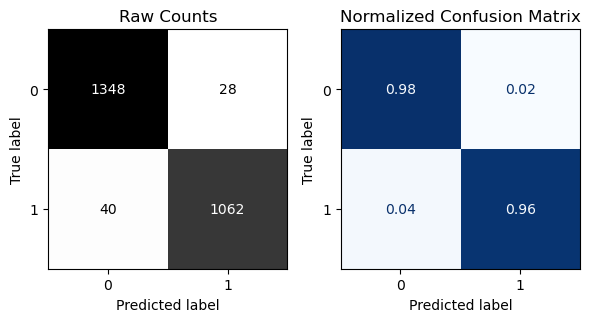


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       492
           1       0.96      0.90      0.93       335

    accuracy                           0.95       827
   macro avg       0.95      0.94      0.94       827
weighted avg       0.95      0.95      0.95       827



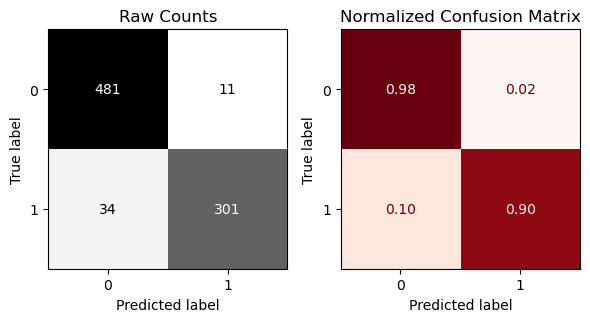

In [11]:
## Create a model pipeline 
count_pipe = Pipeline([('vectorizer',  CountVectorizer()), 
                       ('naivebayes',  MultinomialNB())])

count_pipe.fit(X_train, y_train)
fn.evaluate.evaluate_classification(count_pipe, X_train, y_train, X_test, y_test,)

In [12]:
# # Admin: Saving  for Demo functions in part 1
# import joblib
# fpath_joblib = "../Lecture 1 Pt1 - Making a Custom Module/example-clf-model-with-data.joblib"
# save_for_part1= {'model':count_pipe, 'training data': [X_train, y_train],'test data':[X_test, y_test]}
# joblib.dump(save_for_part1, fpath_joblib)

# Preparing For Deep NLP (Train-Test-Val Datasets)

## Prepare Tensorflow Datasets

Since we already have train/test X and y vars, we will make 2 dataset objects using tf.data.Dataset.from_tensor_slices.

1. The training dataset using X_train, y_train (that we resampled/balanced)
2. The val/test dataset using X_test, y-test.

We will then split the val/test dataset into a val/test split.

<!-- 
### T/T/V Split - Order of Operations (if using 1 dataset object)

1) **Create full dataset object & Shuffle Once.**
2) Calculate number of samples for training and validation data.
3) Create the train/test/val splits using .take() and .skip()
4) **Add shuffle to the train dataset only.**
5) (Optional/Not Used on LP) If applying a transformation (e.g. train_ds.map(...)) to the data, add  here, before .cache()
7) (Optional) Add .cache() to all splits to increase speed  (but may cause problems with large datasets)
8) **Add .batch to all splits (default batch size=32)**
9) (Optional) Add .prefetch(tf.data.AUTOTUNE)
10) (Optional) Print out final length of datasets -->

In [13]:
# Convert training data to Dataset Object
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# Shuffle dataset once
train_ds = train_ds.shuffle(buffer_size=len(train_ds),
                            reshuffle_each_iteration=False)

Create a test and validation dataset using X_test,y_test

In [14]:
# Convert test to dataset object and split
val_test_split_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_test_split_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [15]:
# Calculate # of samples for 50/50 val/test split
n_val_samples =  int(len(val_test_split_ds) * .5)
n_val_samples

413

In [16]:
## Perform the val/test split
## Create the validation dataset
val_ds = val_test_split_ds.take(n_val_samples)

## Create the test dataset
test_ds = val_test_split_ds.skip(n_val_samples)

In [17]:
# Comparing the len gths of all 3 splits
len(train_ds), len(val_ds), len(test_ds)

(2478, 413, 414)

In [18]:
# Shuffle only the training data every epoch
train_ds = train_ds.shuffle(len(train_ds))

In [19]:
#  Setting the batch_size for all datasets
BATCH_SIZE = 32

# use .batch to add batching to all 3 datasets
train_ds = train_ds.batch(BATCH_SIZE)
val_ds = val_ds.batch(BATCH_SIZE)
test_ds = test_ds.batch(BATCH_SIZE)


# Confirm the number of batches in each
print (f' There are {len(train_ds)} training batches.')
print (f' There are {len(val_ds)} validation batches.')
print (f' There are {len(test_ds)} testing batches.')

 There are 78 training batches.
 There are 13 validation batches.
 There are 13 testing batches.


In [20]:
# taking a sample - now 32 observations instead of 1
example_X, example_y= train_ds.take(1).get_single_element()
print(example_X,'\n\n',example_y)

tf.Tensor(
[b'My wife ordered these and tried passing them off as ...: My wife ordered these and tried passing them off as pasta. They are not pasta. They are weird flavorless slop. The texture is slimy and somehow manages to be soft and tough at the same time.'
 b'Love them: Love this so much, they satisfy my craving for pasta  and I already lost 12lb in my first 2 weeks doing keto'
 b'Five Stars: Love it.'
 b'Awful: I should have known better than to order 2 cases without first trying these.  I opened one bag and was knocked over by the horrible fishy smell.  I rinsed and rinsed and heated them up and topped them over with my usual homemade sauce and immediately threw it out.  It was terrible.  I would rather just do without my beloved pasta then eat these.'
 b'fishy smell: these noodles have a very nasty smell to them.  You have to rinse them several times or you will also taste the fishy smell!'
 b'Amazing! Ordering more: I love the angel hair pasta! I prepaired exactly as packet s

A single element now contains 32 samples since we set  batch_size to 32.

In [21]:
## Saving Train and test dataset
fname_train_ds = FPATHS['data']['nn-nlp']['train_dir']
train_ds.save(path=fname_train_ds,)

fname_val_ds = FPATHS['data']['nn-nlp']['val_dir']
val_ds.save(path=fname_val_ds,)

fname_test_ds = FPATHS['data']['nn-nlp']['test_dir']
test_ds.save(path=fname_test_ds,)

2024-02-08 22:08:16.596356: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


## Word Embeddings Demo (Pre-Trained)

###  Pretrianed Word Embeddings with GloVe

- [Click here](https://nlp.stanford.edu/data/glove.6B.zip) to start donwnloading GloVe zip file (glove.6B.zip)
- Unzip the downloaded zip archive.
- Open the extracted folder and find the the `glove.6B.100d.txt` file. (Size is over 300MB )
- Move the text file from Downloads to the same folder as this notebook.
- **Make sure to ignore the large file using GitHub Desktop**

In [22]:
from gensim.models import KeyedVectors
# Load GloVe vectors into a gensim model
glove_model = KeyedVectors.load_word2vec_format("data/glove/glove.6B.100d.txt", binary=False, no_header=True)

In [23]:
# You can now use `glove_model` to access individual word vectors, similar to a dictionary
vector = glove_model['king']
vector

array([-0.32307 , -0.87616 ,  0.21977 ,  0.25268 ,  0.22976 ,  0.7388  ,
       -0.37954 , -0.35307 , -0.84369 , -1.1113  , -0.30266 ,  0.33178 ,
       -0.25113 ,  0.30448 , -0.077491, -0.89815 ,  0.092496, -1.1407  ,
       -0.58324 ,  0.66869 , -0.23122 , -0.95855 ,  0.28262 , -0.078848,
        0.75315 ,  0.26584 ,  0.3422  , -0.33949 ,  0.95608 ,  0.065641,
        0.45747 ,  0.39835 ,  0.57965 ,  0.39267 , -0.21851 ,  0.58795 ,
       -0.55999 ,  0.63368 , -0.043983, -0.68731 , -0.37841 ,  0.38026 ,
        0.61641 , -0.88269 , -0.12346 , -0.37928 , -0.38318 ,  0.23868 ,
        0.6685  , -0.43321 , -0.11065 ,  0.081723,  1.1569  ,  0.78958 ,
       -0.21223 , -2.3211  , -0.67806 ,  0.44561 ,  0.65707 ,  0.1045  ,
        0.46217 ,  0.19912 ,  0.25802 ,  0.057194,  0.53443 , -0.43133 ,
       -0.34311 ,  0.59789 , -0.58417 ,  0.068995,  0.23944 , -0.85181 ,
        0.30379 , -0.34177 , -0.25746 , -0.031101, -0.16285 ,  0.45169 ,
       -0.91627 ,  0.64521 ,  0.73281 , -0.22752 , 

In [24]:
vector.shape

(100,)

In [25]:
# Find similarity between words
glove_model.similarity('king', 'queen')

0.7507691

In [26]:
# Perform word math
result = glove_model.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)
result

[('queen', 0.7698541283607483),
 ('monarch', 0.6843380331993103),
 ('throne', 0.6755736470222473),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534157752991)]

In [27]:
# We can use glove to calculate the most similar
glove_model.most_similar('king')

[('prince', 0.7682329416275024),
 ('queen', 0.7507689595222473),
 ('son', 0.7020888328552246),
 ('brother', 0.6985775828361511),
 ('monarch', 0.6977890729904175),
 ('throne', 0.691999077796936),
 ('kingdom', 0.6811410188674927),
 ('father', 0.6802029013633728),
 ('emperor', 0.6712858080863953),
 ('ii', 0.6676074266433716)]

In [28]:
# Manually calculating new vector for word math
new_vector = glove_model['king'] - glove_model['man'] + glove_model['woman']
new_vector

array([-0.10231996, -0.81294006,  0.10211003,  0.985924  ,  0.34218282,
        1.09095   , -0.48912996, -0.05616698, -0.21029997, -1.02996   ,
       -0.86851   ,  0.36786997,  0.01960999,  0.59259   , -0.23190099,
       -1.016919  , -0.01218399, -1.17194   , -0.52329   ,  0.60645   ,
       -0.98537004, -1.001028  ,  0.48913902,  0.630072  ,  0.58224   ,
        0.15908998,  0.43685   , -1.25351   ,  0.97054   , -0.065529  ,
        0.733763  ,  0.44219002,  1.2091839 ,  0.19698   , -0.15948   ,
        0.34364003, -0.46222997,  0.33772   ,  0.14792705, -0.24959502,
       -0.77093005,  0.522717  , -0.1283    , -0.91881   , -0.01755001,
       -0.44041002, -0.52656496,  0.33734798,  0.60639   , -0.45067   ,
       -0.04158002,  0.08408299,  1.31456   ,  0.67737997, -0.24316001,
       -2.071     , -0.60648996,  0.19710997,  0.63567   ,  0.07819998,
        0.49161002,  0.08171999,  0.70855707,  0.201938  ,  0.5155501 ,
       -0.23025298, -0.40473002,  0.39212003, -0.5093    , -0.13

In [29]:
# Using .most_similar with an array
glove_model.most_similar(new_vector)

[('king', 0.8551837205886841),
 ('queen', 0.7834413647651672),
 ('monarch', 0.6933802366256714),
 ('throne', 0.6833109259605408),
 ('daughter', 0.680908203125),
 ('prince', 0.6713142991065979),
 ('princess', 0.664408266544342),
 ('mother', 0.6579325199127197),
 ('elizabeth', 0.6563301086425781),
 ('father', 0.6392418742179871)]

In [30]:
# Manually calculating new vector for word math
new_vector = glove_model['monarchy'] + glove_model['vote'] + glove_model['government']
glove_model.most_similar(new_vector)

[('government', 0.8555272221565247),
 ('elections', 0.8260869979858398),
 ('vote', 0.821299135684967),
 ('election', 0.7950962781906128),
 ('rule', 0.7902188897132874),
 ('opposition', 0.7764408588409424),
 ('parliament', 0.7697930335998535),
 ('ruling', 0.7695497274398804),
 ('party', 0.7599928379058838),
 ('monarchy', 0.7500120401382446)]

In [31]:
# Manually calculating new vector for word math
new_vector = glove_model['baby'] + glove_model['age']
glove_model.most_similar(new_vector)

[('age', 0.8743536472320557),
 ('baby', 0.8642442226409912),
 ('child', 0.795682430267334),
 ('children', 0.7709920406341553),
 ('older', 0.7629886269569397),
 ('girl', 0.7522111535072327),
 ('mother', 0.7367070317268372),
 ('boy', 0.7361041307449341),
 ('birth', 0.7357129454612732),
 ('couple', 0.7255393266677856)]

In [32]:
# Manually calculating new vector for word math
new_vector = glove_model['baby'] + glove_model['baby']
glove_model.most_similar(new_vector)

[('baby', 0.9999999403953552),
 ('babies', 0.7870863676071167),
 ('newborn', 0.7522428035736084),
 ('boy', 0.7506729364395142),
 ('girl', 0.7423104047775269),
 ('child', 0.7266175746917725),
 ('infant', 0.7064839005470276),
 ('mom', 0.699421226978302),
 ('pregnant', 0.6986744403839111),
 ('toddler', 0.6978277564048767)]

# Returning to Hoover Data

### Create the Training Texts Dataset

In [33]:
# Fit the layer on the training texts
try:
    sequence_vectorizer.adapt(train_ds)
except Exception as e:
    display(e)

NameError("name 'sequence_vectorizer' is not defined")

> We need to get a version of our data that is **only the texts**.

In [34]:
# Get just the text from ds_train
ds_texts = train_ds.map(lambda x, y: x)

# Preview the text
ds_texts.take(1).get_single_element()

<tf.Tensor: shape=(32,), dtype=string, numpy=
array([b"Two of the six bags were ripped and it smelled rotten: This was the worst small I've experienced.  It leaked all over my kitchen floor so I had to bleach everything.\n\n Even so, I opened one of the unripprd bags and rinsed it with water for about ten minutes and cooked it anyway.  It was so so so chewy and disgusting.  Could barely bite into it.  Don't  buy this if you want to spare yourself from nausea and possibly worse",
       b'These noodles are most like an over cooked semolina noodle: These noodles are most like an over cooked semolina noodle. I buy them for their low carbohydrate content.\n\nThey are much easier to make than zoodles or spaghetti squash and serve the same purpose... a carrier for a sauce.',
       b'Not a favorite . . .: Perhaps these are good as far as shirataki noodles go - its my first experience with them.  But I found them to have a funky taste, and to be rubbery no matter how long or short I cooked th

### Determine appropriate sequence length. 

In [35]:
# df_ml['length (characters)'] = df_ml['text'].map(len)
# df_ml.head(3)

# ax = sns.histplot(data=df_ml, hue='rating', x='length (characters)',
#                 stat='percent',common_norm=False)#, estimator='median',);
# ax.axvline()

In [36]:
sequence_lengths = X_train.map(lambda x: len(x.split(" ")))
sequence_lengths.describe()

count    2478.000000
mean       49.979822
std        60.989205
min         2.000000
25%        13.000000
50%        33.000000
75%        63.000000
max       977.000000
Name: review-text-full, dtype: float64

In [37]:
ax = sns

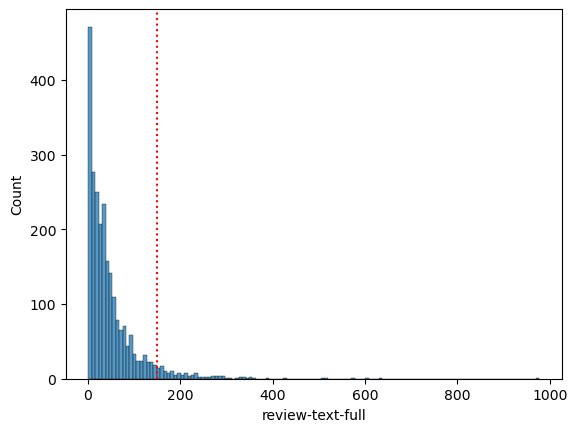

In [38]:
SEQUENCE_LENGTH = 150
ax = sns.histplot(data=sequence_lengths,)# hue='target-rating', x='length (tokens)',kde=True,
                # stat='probability',common_norm=False)#, estimator='median',);
ax.axvline(SEQUENCE_LENGTH, color='red', ls=":")

In [39]:

## Create text Vectorization layer
SEQUENCE_LENGTH=50 #BEST=50
EMBED_DIM = 100 # BEST= 200

sequence_vectorizer = tf.keras.layers.TextVectorization(
    standardize="lower_and_strip_punctuation",
    output_mode="int",
    output_sequence_length=SEQUENCE_LENGTH
)

sequence_vectorizer.adapt(ds_texts)


# Our First Deep Sequence Model

### Simple RNN

In [40]:

VOCAB_SIZE = sequence_vectorizer.vocabulary_size()
SEQUENCE_LENGTH = sequence_vectorizer.get_config()['output_sequence_length']


# Define sequential model with pre-trained vectorization layer and *new* embedding layer
model = Sequential([
    sequence_vectorizer,
    layers.Embedding(input_dim=VOCAB_SIZE,
                              output_dim=EMBED_DIM, 
                              input_length=SEQUENCE_LENGTH)
    ])

In [41]:
### BEST


def build_rnn_model(text_vectorization_layer):
    VOCAB_SIZE = text_vectorization_layer.vocabulary_size()
    SEQUENCE_LENGTH = sequence_vectorizer.get_config()['output_sequence_length']
    
    
    # Define sequential model with pre-trained vectorization layer and *new* embedding layer
    model = Sequential([
        text_vectorization_layer,
        layers.Embedding(input_dim=VOCAB_SIZE,
                                  output_dim=EMBED_DIM, 
                                  input_length=SEQUENCE_LENGTH)
        ])
        
    # Add *new* LSTM layer
    model.add(layers.SimpleRNN(32)) #BEST=32
    
    # Add output layer
    model.add(layers.Dense(1, activation='sigmoid'))
 
    # Compile the model
    model.compile(optimizer=optimizers.legacy.Adam(learning_rate = .001), 
                  loss='bce',#'sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    model.summary()
    return model

# def get_callbacks(patience=3, monitor='val_accuracy'):
#     early_stop = tf.keras.callbacks.EarlyStopping(patience=patience, monitor=monitor)
#     return [early_stop]
# # Code below is from CNN Week
# def get_callbacks(patience=3, monitor='val_accuracy'):
#     early_stop = tf.keras.callbacks.EarlyStopping(patience=patience, monitor=monitor, verbose=True)
#     return [early_stop]


### Call backs
# @tf.function
def get_callbacks(monitor='val_accuracy',patience=3, restore_best_weights=False,
                  start_from_epoch=0,baseline_value=None,
                  verbose_early_stopping=1,  
                  tensborboard=False, logdir="/tmp/tb_logs",
                 tb_embed_freq=0, tb_write_images = False, tb_hist_freq = 0):

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor=monitor, patience=patience, #mode=mode, 
                                                      restore_best_weights=restore_best_weights,
                                                      baseline=baseline_value,
                                                      start_from_epoch=start_from_epoch,
                                                      verbose=verbose_early_stopping)

    if tensborboard:
        tboard = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=tb_hist_freq,write_images=tb_write_images,
                                                embeddings_freq=tb_embed_freq,)
        return [ early_stopping, tboard]
    else:
        return [early_stopping]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 50)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 50, 100)           566300    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                4256      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 570,589
Trainable params: 570,589
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
78/78 [==============================] - 1s 8ms/step - loss: 0.5093 - accuracy: 0.7651 - val_loss: 0.46

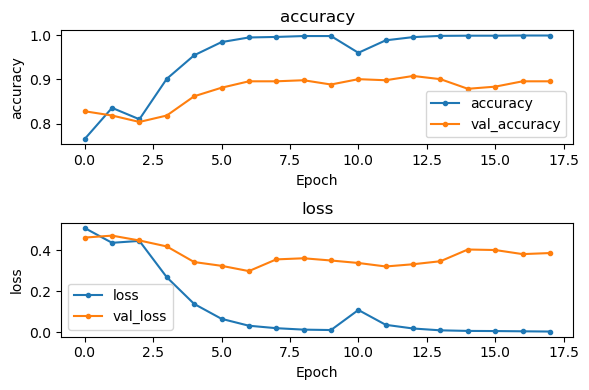

In [42]:
# Build the lstm model and specify the vectorizer
rnn_model = build_rnn_model(sequence_vectorizer)

# Defien number of epocs
EPOCHS = 30
# Fit the model
history = rnn_model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=get_callbacks(patience=5),
)
fn.evaluate.plot_history(history,figsize=(6,4))


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1376
           1       1.00      1.00      1.00      1102

    accuracy                           1.00      2478
   macro avg       1.00      1.00      1.00      2478
weighted avg       1.00      1.00      1.00      2478



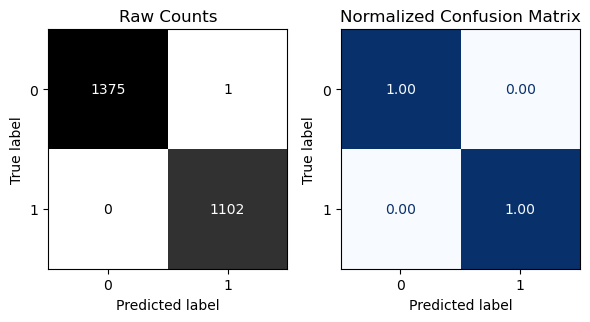


- Evaluating Training Data:
78/78 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 0.9996
{'loss': 0.0031933304853737354, 'accuracy': 0.9995964765548706}
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       238
           1       0.91      0.89      0.90       176

    accuracy                           0.92       414
   macro avg       0.92      0.91      0.92       414
weighted avg       0.92      0.92      0.92       414



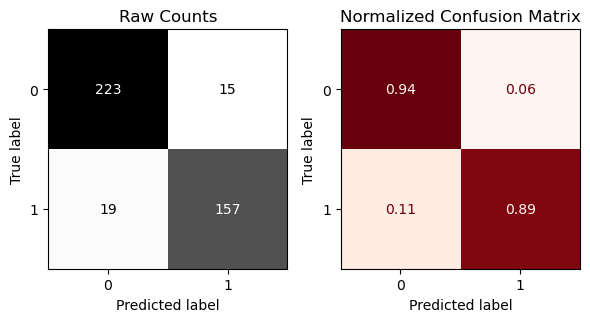


- Evaluating Test Data:
13/13 [==============================] - 0s 2ms/step - loss: 0.3242 - accuracy: 0.9179
{'loss': 0.32417625188827515, 'accuracy': 0.9178743958473206}


In [43]:
# Obtain the results
results = fn.evaluate.evaluate_classification_network(
    rnn_model, X_train=train_ds, 
    X_test=test_ds,# history=history
);

## LSTM

In [44]:
# Define a function for building an LSTM model
from tensorflow.keras import layers, optimizers, regularizers
from tensorflow.keras.models import Sequential


# @tf.function
def build_lstm_model(text_vectorization_layer, binary_task=True):
    VOCAB_SIZE = text_vectorization_layer.vocabulary_size()

    if binary_task == True:
        final_activation = "sigmoid"  # ?
        loss_func = "binary_crossentropy"
        nunits_output = 1
    else:
        final_activation = "softmax"  # ?
        loss_func = "sparse_categorical_crossentropy"
        nunits_output = len(classes)

    # Define sequential model with pre-trained vectorization layer and *new* embedding layer
    lstm_model = Sequential(
        [
            text_vectorization_layer,
            layers.Embedding(
                input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=SEQUENCE_LENGTH
            ),
        ]
    )

    # Add *new* LSTM layer
    lstm_model.add(layers.LSTM(64, recurrent_dropout=0.1, return_sequences=True))
    lstm_model.add(layers.Dropout(0.5))
    lstm_model.add(layers.LSTM(64, return_sequences=True))
    lstm_model.add(layers.GlobalMaxPooling1D())

    # Add output layer
    lstm_model.add(layers.Dense(nunits_output, activation=final_activation))

    # Compile the model
    lr_schedule = optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.01, decay_steps=10000, decay_rate=0.95
    )  # 0.9)
    optimizer = optimizers.legacy.Adam(learning_rate=lr_schedule)
    lstm_model.compile(
        optimizer=optimizer,  #'adam',
        loss=loss_func,  # "sparse_categorical_crossentropy",
        metrics=[  # tf.metrics.Accuracy(name='accuracy'),
            "accuracy",
            tf.metrics.Recall(name="recall")
            # tf.keras.metrics.Recall(class_id=0, name="recall_class_0"),
            # tf.keras.metrics.Recall(class_id=1, name="recall_class_1"),
        ],
    )

    lstm_model.summary()
    return lstm_model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 50)               0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, 50, 50)            283150    
                                                                 
 lstm (LSTM)                 (None, 50, 64)            29440     
                                                                 
 dropout (Dropout)           (None, 50, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 64)            33024     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                       

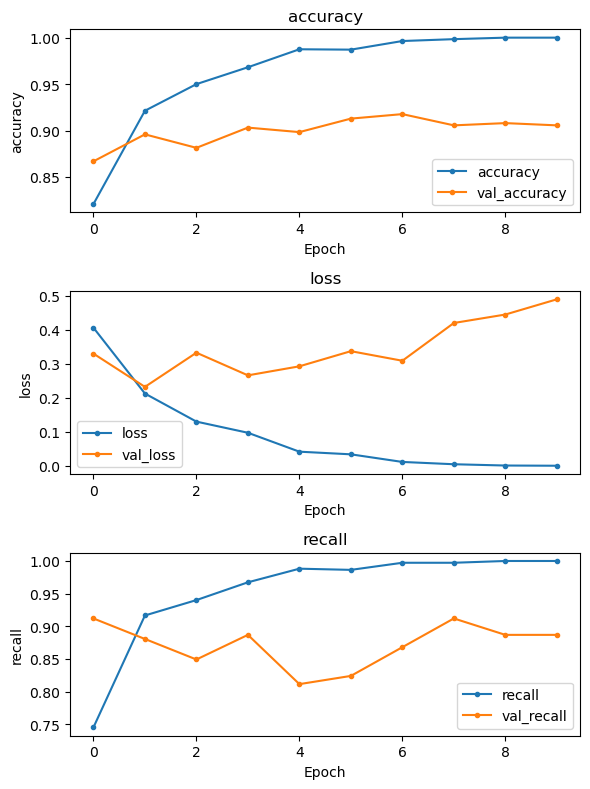

In [45]:
EMBED_DIM = 50
classes = y_train.unique()
# Build the lstm model and specify the vectorizer
lstm_model = build_lstm_model(sequence_vectorizer)

# Defien number of epocs
EPOCHS = 30

# Fit the model
history = lstm_model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=get_callbacks(),
)

ds.evaluate.plot_history(history)


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1376
           1       1.00      1.00      1.00      1102

    accuracy                           1.00      2478
   macro avg       1.00      1.00      1.00      2478
weighted avg       1.00      1.00      1.00      2478



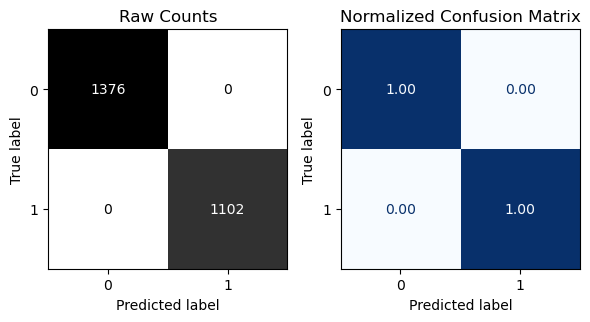


- Evaluating Training Data:
78/78 [==============================] - 1s 7ms/step - loss: 3.7681e-04 - accuracy: 1.0000 - recall: 1.0000
{'loss': 0.000376814539777115, 'accuracy': 1.0, 'recall': 1.0}
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       238
           1       0.96      0.92      0.94       176

    accuracy                           0.95       414
   macro avg       0.95      0.95      0.95       414
weighted avg       0.95      0.95      0.95       414



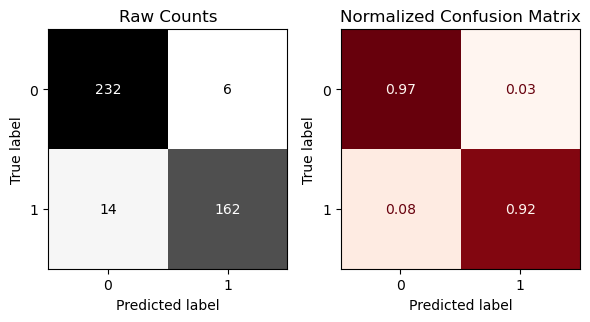


- Evaluating Test Data:
13/13 [==============================] - 0s 8ms/step - loss: 0.2357 - accuracy: 0.9517 - recall: 0.9205
{'loss': 0.23566997051239014, 'accuracy': 0.9516907930374146, 'recall': 0.9204545617103577}


In [46]:
# Obtain the results
results = ds.evaluate.evaluate_classification_network(
    lstm_model, X_train=train_ds, 
    X_test=test_ds,# history=history
);

> ADD SAVING MODEL

In [47]:
# # Saving model in tf format 
# fname_model_lstm = FPATHS['models']['nn']['LSTM_dir']# "Models/keras/lstm/" # Filename is a folder for save_format='tf'
# lstm_model.save(fname_model_lstm, save_format='tf')

### RNN Model 2

In [48]:
def build_gru_model_bi_pool(text_vectorization_layer, binary_task=True):
    VOCAB_SIZE = text_vectorization_layer.vocabulary_size()
    
    if binary_task == True:
        final_activation = "sigmoid"  # ?
        loss_func = "binary_crossentropy"
        nunits_output = 1
    else:
        final_activation = "softmax"  # ?
        loss_func = "sparse_categorical_crossentropy"
        nunits_output = len(classes)
    
    # Define sequential model with pre-trained vectorization layer and *new* embedding layer
    model = Sequential(
        [
            text_vectorization_layer,
            layers.Embedding(
                input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=SEQUENCE_LENGTH
            ),
        ]
    )
    model = Sequential([
        text_vectorization_layer,
        layers.Embedding(input_dim=VOCAB_SIZE,
                      output_dim=EMBED_DIM,
                      input_length=SEQUENCE_LENGTH)])
        
    # Add bidirectional component to GRU layer 
    model.add(layers.Bidirectional(layers.GRU(128, return_sequences = True)))
    
    # Add a pooling layer *new
    model.add(layers.GlobalMaxPooling1D())
    
    # Output layer
    model.add(layers.Dense(nunits_output, activation=final_activation))
                     
    # optimizer = optimizers.legacy.Adam()
    # Compile the model
    lr_schedule = optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.01, decay_steps=10000, decay_rate=0.95
    )  # 0.9)
    optimizer = optimizers.legacy.Adam(learning_rate=lr_schedule)
    model.compile(optimizer=optimizer, 
                  loss=loss_func,
                              metrics=[  # tf.metrics.Accuracy(name='accuracy'),
            "accuracy",
            tf.metrics.Recall(name="recall")
                              ])
    model.summary()
    return model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 50)               0         
 torization)                                                     
                                                                 
 embedding_4 (Embedding)     (None, 50, 50)            283150    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 256)          138240    
 l)                                                              
                                                                 
 global_max_pooling1d_1 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                      

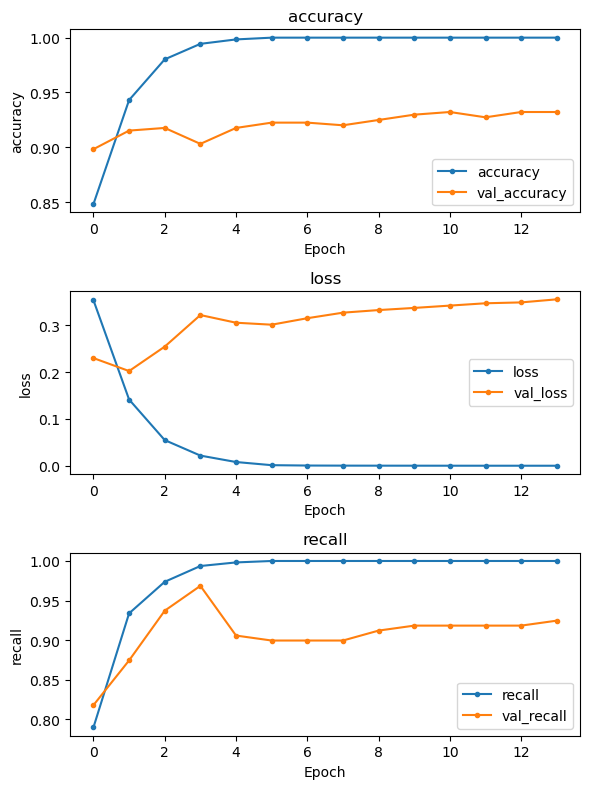

In [49]:
# Build the lstm model and specify the vectorizer
bidirection_model = build_gru_model_bi_pool(sequence_vectorizer)

# Defien number of epocs
EPOCHS = 30

# Fit the model
history = bidirection_model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=get_callbacks(),
)
ds.evaluate.plot_history(history)


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1376
           1       1.00      1.00      1.00      1102

    accuracy                           1.00      2478
   macro avg       1.00      1.00      1.00      2478
weighted avg       1.00      1.00      1.00      2478



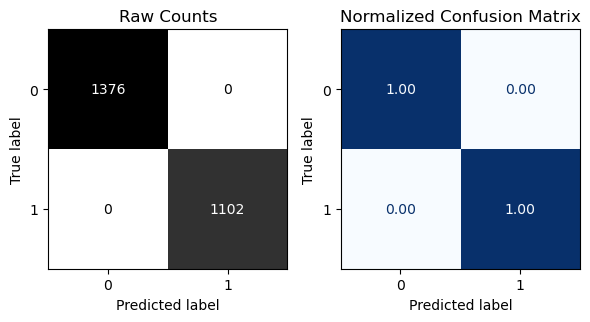


- Evaluating Training Data:
78/78 [==============================] - 1s 10ms/step - loss: 7.4552e-05 - accuracy: 1.0000 - recall: 1.0000
{'loss': 7.455243758158758e-05, 'accuracy': 1.0, 'recall': 1.0}
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       238
           1       0.95      0.93      0.94       176

    accuracy                           0.95       414
   macro avg       0.95      0.94      0.95       414
weighted avg       0.95      0.95      0.95       414



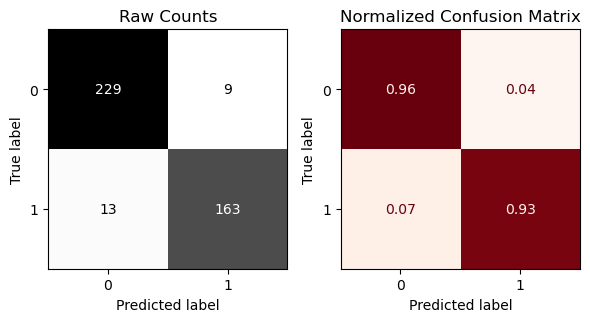


- Evaluating Test Data:
13/13 [==============================] - 0s 13ms/step - loss: 0.2990 - accuracy: 0.9469 - recall: 0.9261
{'loss': 0.29900744557380676, 'accuracy': 0.9468598961830139, 'recall': 0.9261363744735718}


In [50]:
# Obtain the results
results = ds.evaluate.evaluate_classification_network(
    bidirection_model, X_train=train_ds, 
    X_test=test_ds,# history=history
);

In [51]:
# # Saving model in tf format 
# fname_model_gru = FPATHS['models']['nn']['GRU_dir']# "Models/keras/lstm/" # Filename is a folder for save_format='tf'
# bidirection_model.save(fname_model_gru, save_format='tf')

## Attention model

In [52]:
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras import models

def build_attention_model(text_vectorization_layer, binary_task=True):
    VOCAB_SIZE = text_vectorization_layer.vocabulary_size()
    
    if binary_task == True:
        final_activation = "sigmoid"  # ?
        loss_func = "binary_crossentropy"
        nunits_output = 1
    else:
        final_activation = "softmax"  # ?
        loss_func = "sparse_categorical_crossentropy"
        nunits_output = len(classes)

    # Input layer
    input_layer = layers.Input(shape=(SEQUENCE_LENGTH,), dtype=tf.string) 
    flattened_input = tf.reshape(input_layer, (-1,))
    

    # Vectorization and embedding
    x = text_vectorization_layer(flattened_input)
    x = layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=SEQUENCE_LENGTH)(x)

    # MultiHeadAttention
    # In this case, using the same tensor for query, key, and value
    attention_output = layers.MultiHeadAttention(num_heads=4, key_dim=200, value_dim=EMBED_DIM)(x, x, x)
    x = layers.Flatten()(attention_output)

    # Further layers
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(nunits_output, activation=final_activation)(x)

    # Model creation
    model = models.Model(inputs=input_layer, outputs=outputs)

    # optimizer = optimizers.legacy.Adam()
    # Compile the model
    lr_schedule = optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.01, decay_steps=10000, decay_rate=0.95
    )  # 0.9)
    optimizer = optimizers.legacy.Adam(learning_rate=lr_schedule)
    
    model.compile(optimizer=optimizer, 
                  loss=loss_func,
                              metrics=[  # tf.metrics.Accuracy(name='accuracy'),
            "accuracy",
            tf.metrics.Recall(name="recall")
                              ])
    model.summary()
    return model


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 tf.reshape (TFOpLambda)        (None,)              0           ['input_1[0][0]']                
                                                                                                  
 text_vectorization (TextVector  (None, 50)          0           ['tf.reshape[0][0]']             
 ization)                                                                                         
                                                                                                  
 embedding_5 (Embedding)        (None, 50, 50)       283150      ['text_vectorization[5][0]'] 

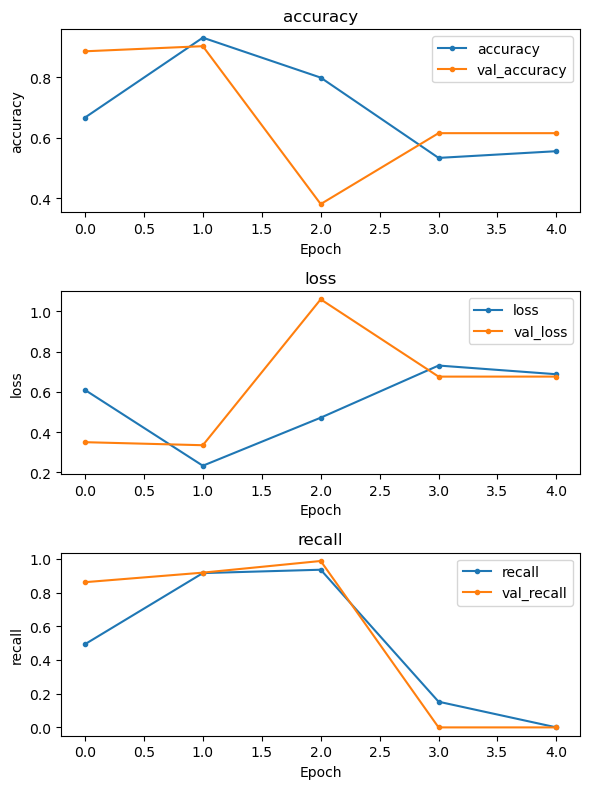

In [53]:
# Build the lstm model and specify the vectorizer
attention_model = build_attention_model(sequence_vectorizer, binary_task=True)

# Defien number of epocs
EPOCHS = 30

# Fit the model
history = attention_model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=get_callbacks(),
)
ds.evaluate.plot_history(history)


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.56      1.00      0.71      1376
           1       0.00      0.00      0.00      1102

    accuracy                           0.56      2478
   macro avg       0.28      0.50      0.36      2478
weighted avg       0.31      0.56      0.40      2478



/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

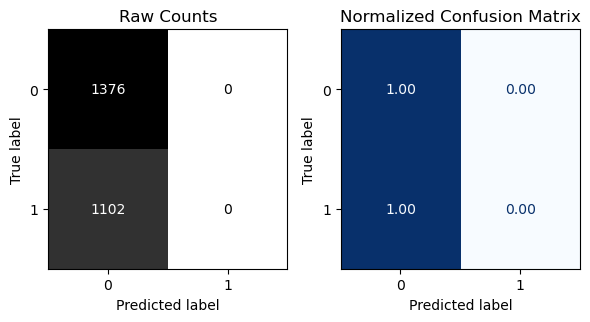


- Evaluating Training Data:
 6/78 [=>............................] - ETA: 0s - loss: 0.6848 - accuracy: 0.5677 - recall: 0.0000e+00

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

78/78 [==============================] - 1s 12ms/step - loss: 0.6871 - accuracy: 0.5553 - recall: 0.0000e+00
{'loss': 0.6871389150619507, 'accuracy': 0.5552865266799927, 'recall': 0.0}
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       238
           1       0.00      0.00      0.00       176

    accuracy                           0.57       414
   macro avg       0.29      0.50      0.37       414
weighted avg       0.33      0.57      0.42       414



/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

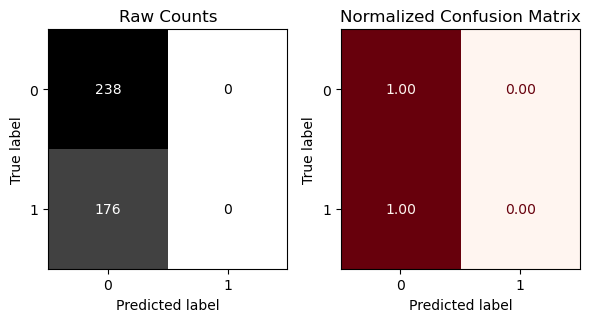


- Evaluating Test Data:
11/13 [========================>.....] - ETA: 0s - loss: 0.6820 - accuracy: 0.5824 - recall: 0.0000e+00

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

13/13 [==============================] - 0s 11ms/step - loss: 0.6834 - accuracy: 0.5749 - recall: 0.0000e+00
{'loss': 0.6833916902542114, 'accuracy': 0.5748792290687561, 'recall': 0.0}


In [54]:
# Obtain the results
results = ds.evaluate.evaluate_classification_network(
    attention_model, X_train=train_ds, 
    X_test=test_ds,# history=history
);